# Saving cropped images to png files and converting them to mp4

In `main.js` uncomment `await drawCroppedFaces(camElem, searchCanvasCamShowElem, searchEmbeddings.strokedRects)` to download and save cropped images, then move them to `data` folder.

To convert the images to mp4, run the following command in the terminal:
```
ffmpeg -framerate 10 -i data/frame_%d.png -c:v libx264 -pix_fmt yuv420p cropped_face.mp4
```

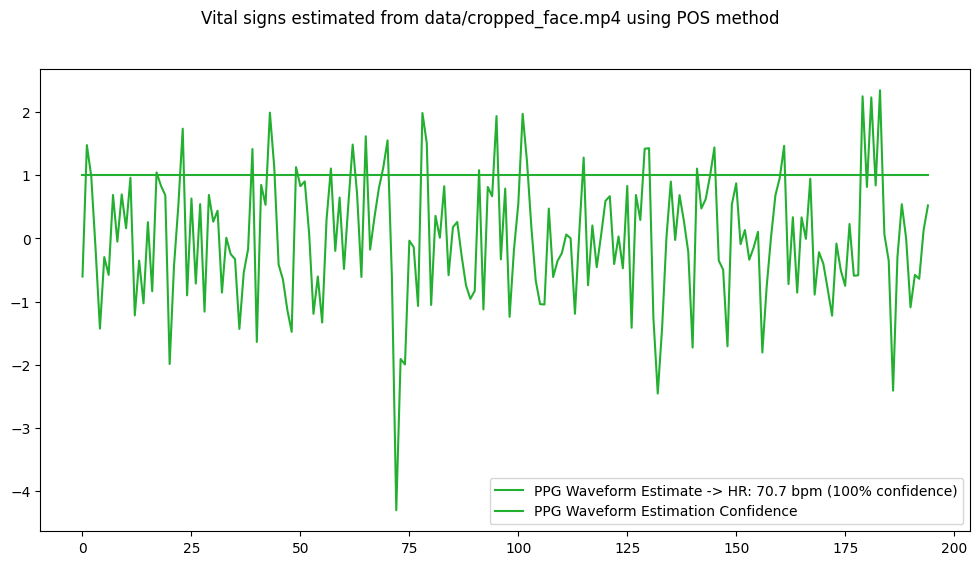

In [1]:
import matplotlib.pyplot as plt
from vitallens import VitalLens, Method

# Download sample data if necessary
video_path = 'data/cropped_face.mp4'
# vitals_path = 'examples/sample_vitals_1.csv'

# Initialize VitalLens with POS method
vl = VitalLens(method=Method.POS)

# Estimate vitals
result = vl(video=video_path)

# Plot the results
vital_signs = result[0]['vital_signs']
fig, (ax1) = plt.subplots(1, sharex=True, figsize=(12, 6))
fig.suptitle('Vital signs estimated from {} using POS method'.format(video_path))

ax1.plot(vital_signs['ppg_waveform']['data'], color='#23b031', label='PPG Waveform Estimate -> HR: {:.1f} bpm ({:.0f}% confidence)'.format(
    vital_signs['heart_rate']['value'], vital_signs['heart_rate']['confidence']*100))
ax1.plot(vital_signs['ppg_waveform']['confidence'], color='#23b031', label='PPG Waveform Estimation Confidence')
ax1.legend()
plt.show()